# Getting started with Titanic

In [1]:
# Librerías necesarias

import numpy as np 
from random import random

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import pandas as pd 


from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn import tree, neighbors, ensemble, svm
import xgboost as xgb

# Los archivos de datos están disponibles en el directorio "../input/"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Hay tres archivos que existen en este fichero: (1) train.csv, (2) test.csv y (3) gender_submission.csv

En esta celda cargamos el archivo train.csv, contiene información de los pasajeros a bordo (891 pasajeros, uno por cada celda en la tabla)

Los valores en la columna "Survived" determinan si el pasajero sobrevivió o no:

si es un "1", el pasajero sobrevivió
si es un "0", el pasajero murió

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos a mirar cuáles son las características de nuestros datos :

Pclass : 1st = Upper Class 2nd = Middle Class 3rd = Lower Class

sibsp : The # of siblings / spouses aboard the Titanic

 Sibling = brother, sister, stepbrother, stepsister 
 Spouse = husband, wife 
parch : The # of parents / children aboard the Titanic Parent = mother, father Child = daughter, son, stepdaughter, stepson

Ticket : Ticket number

Fare : Passenger fare

Cabin : Cabin number embarked

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

Adeamás tenemos las características Name, Sex y Age.

En esta celda cargamos el archivo test.csv, contiene información pasajeros a bordo (418 pasajeros). A partir de los patrones de train.csv, se va predecir si el pasajero sobrevivió o no.

In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

female = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

El método describe() devuelve información estadística de los datos del dataframe

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Primero vamos a realizar un análisis de los datos (Exploratory Data Analysis o EDA).

Para comenzar a controlar el total de los valores nulos de las celdas.

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

El método map() crea un nuevo array con los resultados de la llamada a la función indicada aplicados a cada uno de sus elementos.

In [6]:
train["Sex"] = train["Sex"].map({"female" : 1, "male" : 0 })
test["Sex"] = test["Sex"].map({"female" : 1, "male" : 0 })

La columna Cabina y Ticket podemos pensar que no es demasiado relevante para nuestro modelo. Vamos a borrarlas de nuestro conjunto de entrenamiento y test.

In [7]:
train.drop(["Cabin", "Ticket"], axis =1 ,inplace =True)
test.drop(["Cabin", "Ticket"], axis =1 ,inplace =True)

Ahora hay que completar con los datos faltantes. 

Método que vamos a usar es completar con un valor aleatorio entre la media y la desviación estándar de la edad

In [8]:
mean1, std1 = np.mean(train["Age"]), np.std(train["Age"])
mean2, std2 = np.mean(test["Age"]), np.std(test["Age"])

#Los vacíos los representamos con 0
train["Age"].fillna(0.0, inplace=True)
test["Age"].fillna(0.0, inplace=True)

Realizamos el procedimiento para datos de entrenamiento

In [9]:
for i in range(len(train["Age"])):
    #Si es un 0, es que estaba vacío
    if train["Age"].iloc[i] == 0.0 :
        train["Age"].iloc[i] = mean1 + ((-1)**(np.random.choice([0,1])))*std1*random()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Realizamos el mismo procedimiento también para datos de test

In [10]:
for i in range(len(test["Age"])):
    if test["Age"].iloc[i] == 0.0 :
        test["Age"].iloc[i] = mean2 + ((-1)**(np.random.choice([0,1])))*std2*random()

Vamos a seguir rellenando valores NaN

Como podemos ver que la mayoría de personas embarcaron del puerto S, vamos a reemplazar los valores nulos por este puerto.

In [11]:
train["Embarked"].fillna("S", inplace =True)

Miramos ahora la columna del nombre de los pasajeros

In [12]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Podemos extraer las Iniciales del Nombre. Se nos puede ocurrir utilizar la columna Name, para utilizar el prefijo Mr or Mrs.

In [13]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

Contamos el número de prefijos que aparece en cada nombre.

In [14]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Hay ocaciones que Miss puede estar mal escrito con Mlle or Mme. Las reemplazamos por característica Rare.

In [15]:
train["Title"].replace(["Dr","Rev","Col","Mlle","Major","Sir","Mme","Jonkheer","Lady","Don","Ms","Countess","Capt"], "Rare", inplace =True)
test["Title"].replace(["Dr","Rev","Col","Mlle","Major","Sir","Mme","Jonkheer","Lady","Don","Ms","Countess","Capt"], "Rare", inplace =True)

Observamos los prefijos que aparecen únicos

In [16]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

Cambiamos de una característica continua a una categórica para mayor compresión de nuestro conjunto de datos

In [17]:
train["Title"] = train["Title"].map({"Mr": 1, "Mrs" : 2 , "Miss" : 3, "Master" : 4, "Rare" : 5})
test["Title"] = test["Title"].map({"Mr": 1, "Mrs" : 2 , "Miss" : 3, "Master" : 4, "Rare" : 5})

Vemos los valores de la columna Embarque 

In [18]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

También necesitamos cambiar los puertos S, C y Q por los valores continuos 0, 1 y 2

In [19]:
train["Embarked"] = train["Embarked"].map({"S" : 0 , "C" : 1 , "Q" : 2})
test["Embarked"] = test["Embarked"].map({"S" : 0 , "C" : 1 , "Q" : 2})

Observamos los cambios que hemos hecho en el conjunto de datos

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


Podemos pensar que la columna Name no sea demasiado interesante. La quitamos

In [21]:
train.drop(["Name"], inplace =True , axis = 1)
test.drop(["Name"], inplace =True , axis = 1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,3
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,1


Realizamos un gráfico sencillo para comprobar la incidencia de la edad en la columna Survived

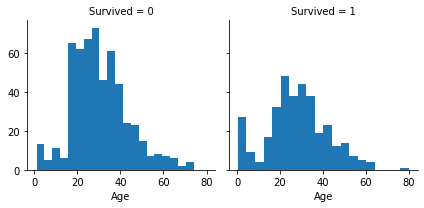

In [23]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Realizamos el mismo gráfico para la variable Tarifa 

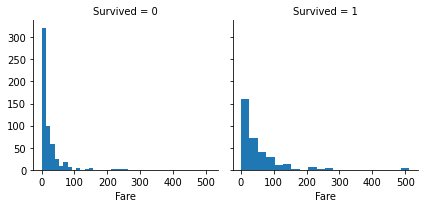

In [24]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1.0
1,893,3,1,47.0,1,0,7.0000,0,2.0
2,894,2,0,62.0,0,0,9.6875,2,1.0
3,895,3,0,27.0,0,0,8.6625,0,1.0
4,896,3,1,22.0,1,1,12.2875,0,2.0


A partir de esta figura y la tabla anterior, podemos decir que es útil una división en 5 clases para la edad y 4 para la tarifa. Ordenamos también las dos variables.

In [26]:
train['Age_Class'] = pd.cut(train['Age'], 5)
train['Fare_Class'] = pd.cut(train["Fare"],4)

train[['Age_Class', 'Survived']].groupby(['Age_Class'], as_index=False).mean().sort_values(by='Age_Class', ascending=True)
train[['Fare_Class', 'Survived']].groupby(['Fare_Class'], as_index=False).mean().sort_values(by='Fare_Class', ascending=True)

test['Age_Class'] = pd.cut(test['Age'], 5)
test['Fare_Class'] = pd.cut(test["Fare"],4)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class,Fare_Class
0,1,0,3,0,22.0,1,0,7.2500,0,1,"(16.336, 32.252]","(-0.512, 128.082]"
1,2,1,1,1,38.0,1,0,71.2833,1,2,"(32.252, 48.168]","(-0.512, 128.082]"
2,3,1,3,1,26.0,0,0,7.9250,0,3,"(16.336, 32.252]","(-0.512, 128.082]"
3,4,1,1,1,35.0,1,0,53.1000,0,2,"(32.252, 48.168]","(-0.512, 128.082]"
4,5,0,3,0,35.0,0,0,8.0500,0,1,"(32.252, 48.168]","(-0.512, 128.082]"


Utilizamos estas dos columnas para generar los rangos

Como dijimos dividimos la edad en 0-4 variables.

Como dijimos dividimos la tarifa en 0-3 variables.

Realizamos el procedimiento para ambos conjuntos de datos


In [28]:
train.loc[train["Age"] <= 16 , "Age"] = 0  
train.loc[(train["Age"] > 16) & (train["Age"] <= 32), "Age"] = 1
train.loc[(train["Age"] > 32) & (train["Age"] <= 48), "Age"] = 2
train.loc[(train["Age"] > 48) & (train["Age"] <= 64), "Age"] = 3
train.loc[train['Age'] > 64, 'Age'] = 4

train.loc[train["Fare"] <= 128.082 , "Fare"] = 0  
train.loc[(train["Fare"] > 128.082) & (train["Fare"] <= 256.165), "Fare"] = 1
train.loc[(train["Fare"] > 256.165) & (train["Fare"] <= 384.247), "Fare"] = 2
train.loc[train["Fare"] > 384.247, "Fare"] = 3

In [29]:
test.loc[test["Age"] <= 16 , "Age"] = 0  
test.loc[(test["Age"] > 16) & (test["Age"] <= 32), "Age"] = 1
test.loc[(test["Age"] > 32) & (test["Age"] <= 48), "Age"] = 2
test.loc[(test["Age"] > 48) & (test["Age"] <= 64), "Age"] = 3
test.loc[test['Age'] > 64, 'Age'] = 4

test.loc[test["Fare"] <= 128.082 , "Fare"] = 0  
test.loc[(test["Fare"] > 128.082) & (test["Fare"] <= 256.165), "Fare"] = 1
test.loc[(test["Fare"] > 256.165) & (test["Fare"] <= 384.247), "Fare"] = 2
test.loc[test["Fare"] > 384.247, "Fare"] = 3

Ahora que estamos trabajando solo con valores numéricos, podemos encontrar las correlaciones entre los parámetros para ver si eliminar o agregar otros.

Estas dos columnas no las necesitamos

In [30]:
train.drop(["Age_Class", "Fare_Class"], axis = 1 , inplace =True)
test.drop(["Age_Class", "Fare_Class"], axis = 1 , inplace =True)

Intentamos encontrar las relaciones entre las variables que mantenemos

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


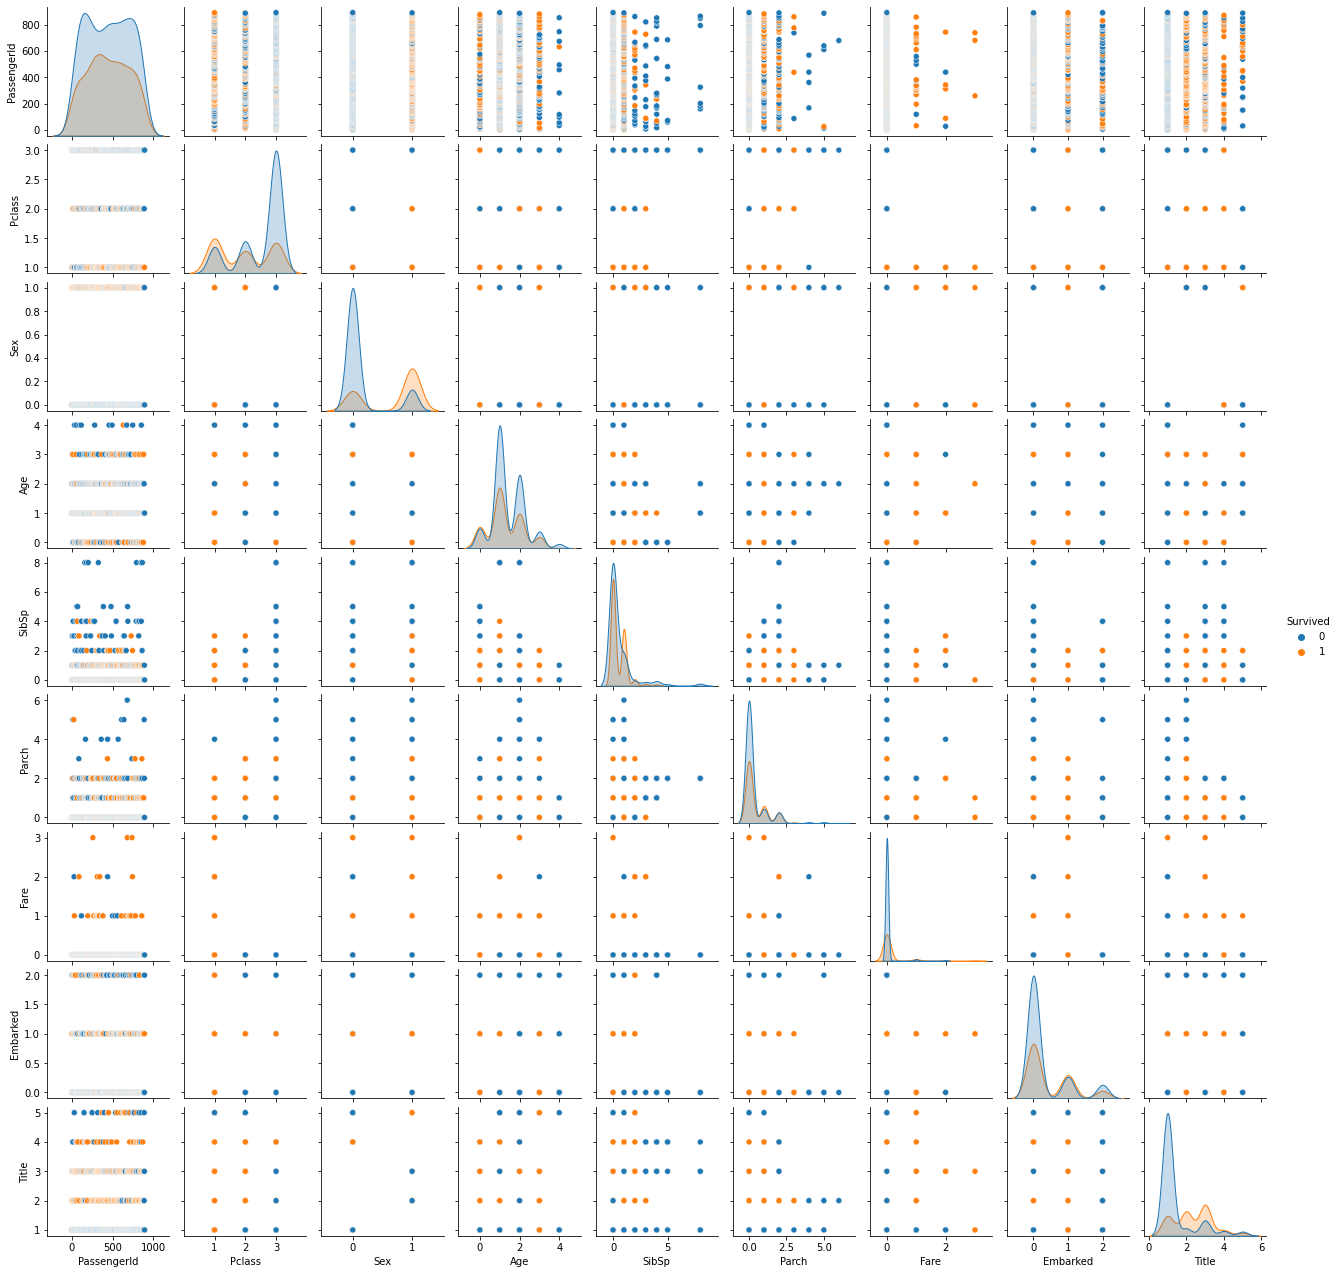

In [31]:
sns.pairplot(train, hue ="Survived", size = 2)

Por último, vamos a mirar la correlación entre caracterísiticas con nuestro heatmap.

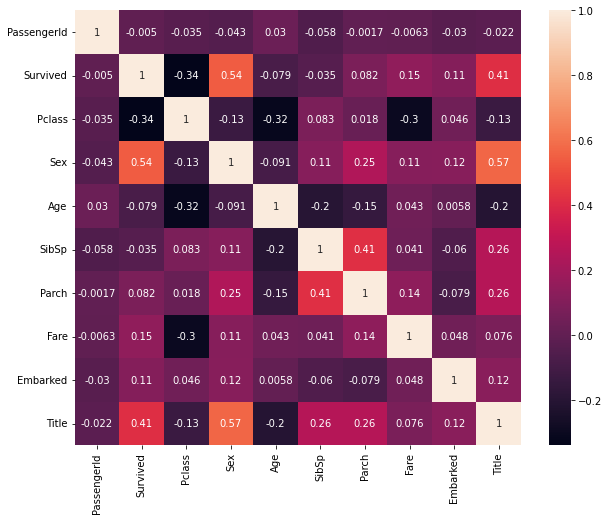

In [32]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Existe una gran correlación entre los parámetros (Sexo, Título) y (Parch, SibSp). El sexo es una subparte del título por lo que podemos eliminarlo y podemos reemplazar Parch y SibSp por el tamaño de la familia (FamilySize)

In [33]:
test["FamilySize"] = test["Parch"] + test["SibSp"] + 1
train["FamilySize"] = train["Parch"] + train["SibSp"] + 1

In [34]:
pass_test = test["PassengerId"]
test.drop(["PassengerId", "Title", "Parch", "SibSp","Fare"], axis = 1, inplace =True )
train.drop(["PassengerId", "Title", "Parch", "SibSp", "Fare"], axis = 1, inplace =True )

Esta es la apariencia final de los datos antes de entrenar el modelo

In [35]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,3,0,1.0,0,2
1,1,1,1,2.0,1,2
2,1,3,1,1.0,0,1
3,1,1,1,2.0,0,2
4,0,3,0,2.0,0,1


Estamos comenzando a crear nuestros primeros modelos de Machine Learning para predecir resultados. Nos enfrentamos a un problema de clasificación supervisada, por lo que nos limitamos de entrada a estos modelos:

- XGBClassifier \ Regresión logística
- Árbol de decisión
- KNeighborsClassifier
- Support Vector Machines 
- Random Forest 
- Naive Bayes 

In [36]:
models, scores = [], []

gbm =  xgb.XGBClassifier(n_estimators= 2000, objective= 'binary:logistic')

lgr = LogisticRegression()

dt = tree.DecisionTreeClassifier()

knn1 = neighbors.KNeighborsClassifier(n_neighbors = 2)
knn2 = neighbors.KNeighborsClassifier(n_neighbors = 4 )
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 10)
knn4 = neighbors.KNeighborsClassifier(n_neighbors = 20)

rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf1 = ensemble.RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
rf2 = ensemble.RandomForestClassifier(n_estimators=40, max_depth=5, random_state=1)
rf3 = ensemble.RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
rf4 = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)

svc = svm.SVC()

models.extend([gbm,lgr,dt,knn1,knn2,knn3,knn4, rf,rf1, rf2, rf3, rf4, svc])

Dividimos con nuestra función train_test_split nuestros datos en entrenamiento y validación

In [37]:
from sklearn.model_selection import train_test_split
Y_train = train["Survived"]
X_train = train.drop(["Survived"], axis= 1)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.10, random_state = 42)

Entrenamos todos los modelos y guardamos el score de cada uno de ellos para comprobar 
cual funciona mejor

In [38]:
for model in models :
    model.fit(x_train, y_train)
    score = model.score(x_val, y_val)
    scores.append(score)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Ordenamos los modelos según la clasificación correcta

In [39]:
Model = pd.DataFrame({'Model': models, 'Score': scores})
Model.sort_values('Score', ascending = False)
Model

,Model,Score
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.811111
1,LogisticRegression(),0.844444
2,DecisionTreeClassifier(),0.822222
3,KNeighborsClassifier(n_neighbors=2),0.766667
4,KNeighborsClassifier(n_neighbors=4),0.800000
5,KNeighborsClassifier(n_neighbors=10),0.822222
6,KNeighborsClassifier(n_neighbors=20),0.811111
7,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.833333
8,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.833333
9,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.811111


De acuerdo con estos resultados, podemos elegir el modelo "XGBClassifier" para nuestra clasificación, que da de las puntuaciones más altas.

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

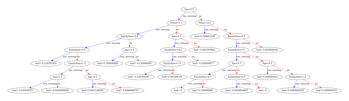

In [40]:
from xgboost import plot_tree
model_final = models[0]
model_final.fit(x_train, y_train)
plot_tree(model_final)

Una vez realizado el entrenamiento, le pasamos al modelo nuevos ejemplos que no ha visto para que realice una predicción.

Creamos el fichero final para submission.csv

In [41]:
rf1.fit(X_train, Y_train)
test_pred = rf1.predict(test)

submission = pd.DataFrame({
        "PassengerId": pass_test,
        "Survived": test_pred
    })
submission.to_csv('submission.csv', index=False)